In [ ]:
!wget --no-check-certificate \
 https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2023-01-20 11:43:49--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2023-01-20 11:43:49--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M   176MB/s    in 

In [ ]:
import os 
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/Chessman-image-dataset/Chess')

['King', 'Rook', 'Bishop', 'Pawn', 'Queen', 'Knight']

In [ ]:
print('Total pawn images : ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Pawn')))
print('Total king images : ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/King')))
print('Total knight images : ', len(os.listdir('/tmp/Chessman-image-dataset/Chess/Knight')))

Total pawn images :  107
Total king images :  76
Total knight images :  106


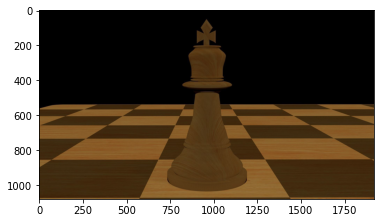

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000145.png')
plt.imshow(img)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join('/tmp/Chessman-image-dataset/Chess')
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20, 
                                   zoom_range = 0.2, 
                                   shear_range = 0.2, 
                                   fill_mode = 'nearest', 
                                   validation_split = 0.1) #set validation split

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [ ]:
# implementasikan transfer learning dengan resnet152v2
# model resnet 152v2 memiliki sebanyak 152 layer dan tersedia di keras
import tensorflow as tf

from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2

model_resnet = tf.keras.models.Sequential([
    ResNet152V2(weights = "imagenet", include_top = False,
                input_tensor = Input(shape=(150, 150, 3))),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation = 'relu'),
  tf.keras.layers.Dense(256, activation = 'relu'),
  tf.keras.layers.Dense(6, activation = 'softmax')    
])

model_resnet.layers[0].trainable = False

In [ ]:
model_resnet.compile(optimizer = tf.optimizers.Adam(), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [ ]:
history = model_resnet.fit(train_generator, 
                           validation_data = validation_generator, 
                           epochs = 50 ,
                           verbose = 2)

Epoch 1/50
63/63 - 146s - loss: 8.1502 - accuracy: 0.4569 - val_loss: 1.2142 - val_accuracy: 0.7308 - 146s/epoch - 2s/step
Epoch 2/50
63/63 - 131s - loss: 2.0457 - accuracy: 0.6573 - val_loss: 1.5810 - val_accuracy: 0.6731 - 131s/epoch - 2s/step
Epoch 3/50
63/63 - 131s - loss: 1.1049 - accuracy: 0.7876 - val_loss: 1.2340 - val_accuracy: 0.7500 - 131s/epoch - 2s/step
Epoch 4/50
63/63 - 131s - loss: 1.1388 - accuracy: 0.7695 - val_loss: 1.8303 - val_accuracy: 0.6731 - 131s/epoch - 2s/step
Epoch 5/50
63/63 - 132s - loss: 0.9452 - accuracy: 0.8136 - val_loss: 1.8770 - val_accuracy: 0.6731 - 132s/epoch - 2s/step
Epoch 6/50
63/63 - 129s - loss: 0.5945 - accuracy: 0.8517 - val_loss: 2.0856 - val_accuracy: 0.6154 - 129s/epoch - 2s/step
Epoch 7/50
63/63 - 130s - loss: 0.6681 - accuracy: 0.8497 - val_loss: 1.6654 - val_accuracy: 0.6731 - 130s/epoch - 2s/step
Epoch 8/50
63/63 - 130s - loss: 0.6535 - accuracy: 0.8637 - val_loss: 1.0938 - val_accuracy: 0.7500 - 130s/epoch - 2s/step
Epoch 9/50
63/63

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator, 
                 validation_data = validation_generator,
                 epochs =  50,
                 verbose = 2
                 )

Epoch 1/50
63/63 - 38s - loss: 1.8240 - accuracy: 0.1924 - val_loss: 1.7887 - val_accuracy: 0.2115 - 38s/epoch - 607ms/step
Epoch 2/50
63/63 - 36s - loss: 1.7887 - accuracy: 0.1723 - val_loss: 1.7828 - val_accuracy: 0.1923 - 36s/epoch - 579ms/step
Epoch 3/50
63/63 - 36s - loss: 1.7707 - accuracy: 0.2084 - val_loss: 1.7805 - val_accuracy: 0.1731 - 36s/epoch - 578ms/step
Epoch 4/50
63/63 - 36s - loss: 1.7424 - accuracy: 0.2405 - val_loss: 1.7661 - val_accuracy: 0.2500 - 36s/epoch - 577ms/step
Epoch 5/50
63/63 - 37s - loss: 1.6917 - accuracy: 0.2725 - val_loss: 1.9234 - val_accuracy: 0.2115 - 37s/epoch - 594ms/step
Epoch 6/50
63/63 - 36s - loss: 1.7007 - accuracy: 0.2705 - val_loss: 1.8334 - val_accuracy: 0.2115 - 36s/epoch - 575ms/step
Epoch 7/50
63/63 - 36s - loss: 1.6697 - accuracy: 0.2826 - val_loss: 1.7252 - val_accuracy: 0.3269 - 36s/epoch - 574ms/step
Epoch 8/50
63/63 - 36s - loss: 1.6455 - accuracy: 0.2906 - val_loss: 1.6868 - val_accuracy: 0.2885 - 36s/epoch - 575ms/step
Epoch 9/

<ipython-input-13-135e177bbb33>:8: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['train', 'test'], loc = 'upper_left')


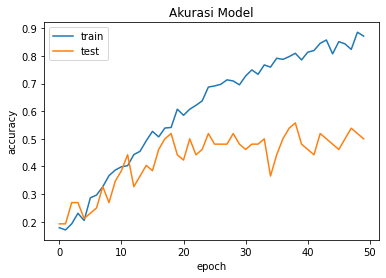

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Akurasi Model")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper_left')
plt.show()

<ipython-input-14-b547582e905c>:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(['train', 'test'], loc = 'upper_left')


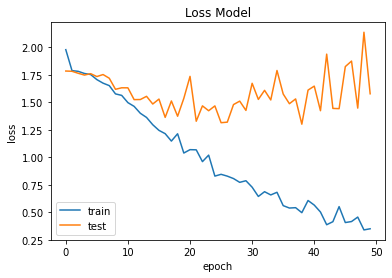

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Model")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper_left')
plt.show()